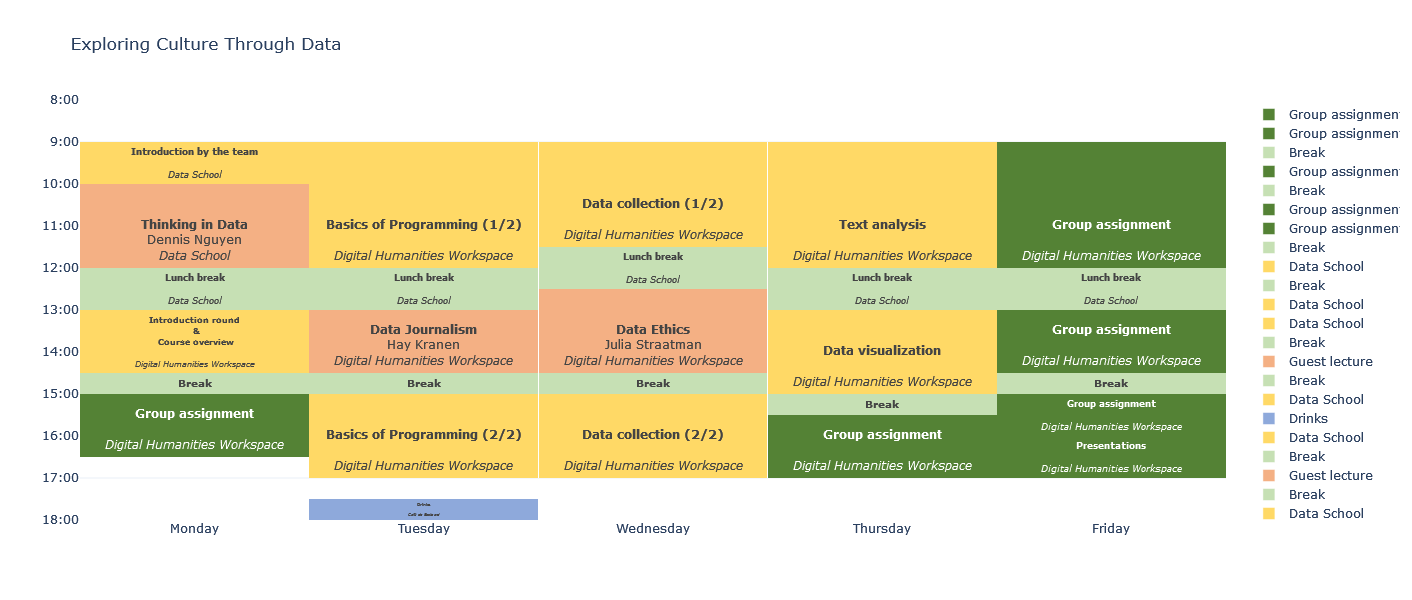

In [118]:
import plotly.graph_objects as go
import pandas as pd

# Sample data for a weekly schedule with titles
schedule = [
    {"task": "Data School", "day": "Monday", "start": "09:00", "end": "10:00", "title": "Introduction by the team", "location" : "Data School"},
    {"task": "Guest lecture", "day": "Monday", "start": "10:00", "end": "12:00", "title": "Thinking in Data", "presenter": "Dennis Nguyen", "presenter_url": "https://www.uu.nl/staff/DNguyen1", "location": "Data School"},
    {"task": "Break", "day": "Monday", "start": "12:00", "end": "13:00", "title": "Lunch break", "location" : "Data School"},
    {"task": "Data School", "day": "Monday", "start": "13:00", "end": "14:30", "title": "Introduction round<br> &<br> Course overview", "location" : "Digital Humanities Workspace"},
    {"task": "Break", "day": "Monday", "start": "14:30", "end": "15:00", "title": "Break"},
    {"task": "Group assignment", "day": "Monday", "start": "15:00", "end": "16:30", "title": "Group assignment", "location" : "Digital Humanities Workspace"},
    {"task": "Data School", "day": "Tuesday", "start": "09:00", "end": "12:00", "title": "Basics of Programming (1/2)", "location" : "Digital Humanities Workspace"},
    {"task": "Break", "day": "Tuesday", "start": "12:00", "end": "13:00", "title": "Lunch break", "location" : "Data School"},
    {"task": "Guest lecture", "day": "Tuesday", "start": "13:00", "end": "14:30", "title": "Data Journalism","presenter": "Hay Kranen", "presenter_url": "https://www.haykranen.nl/",  "location" : "Digital Humanities Workspace"},
    {"task": "Break", "day": "Tuesday", "start": "14:30", "end": "15:00", "title": "Break"},
    {"task": "Data School", "day": "Tuesday", "start": "15:00", "end": "17:00", "title": "Basics of Programming (2/2)", "location" : "Digital Humanities Workspace"},
    {"task": "Drinks", "day": "Tuesday", "start": "17:30", "end": "18:00", "title": "Drinks", "location" : "Café de Bastaard"},
    {"task": "Data School", "day": "Wednesday", "start": "09:00", "end": "11:30", "title": "Data collection (1/2)", "location" : "Digital Humanities Workspace"},
    {"task": "Break", "day": "Wednesday", "start": "11:30", "end": "12:30", "title": "Lunch break", "location" : "Data School"},
    {"task": "Guest lecture", "day": "Wednesday", "start": "12:30", "end": "14:30", "title": "Data Ethics","presenter": "Julia Straatman", "presenter_url": "https://www.uu.nl/staff/JStraatman",  "location" : "Digital Humanities Workspace"},
    {"task": "Break", "day": "Wednesday", "start": "14:30", "end": "15:00", "title": "Break"},
    {"task": "Data School", "day": "Wednesday", "start": "15:00", "end": "17:00", "title": "Data collection (2/2)", "location" : "Digital Humanities Workspace"},
    {"task": "Data School", "day": "Thursday", "start": "09:00", "end": "12:00", "title": "Text analysis", "location" : "Digital Humanities Workspace"},
    {"task": "Break", "day": "Thursday", "start": "12:00", "end": "13:00", "title": "Lunch break", "location" : "Data School"},
    {"task": "Data School", "day": "Thursday", "start": "13:00", "end": "15:00", "title": "Data visualization", "location" : "Digital Humanities Workspace"},
    {"task": "Break", "day": "Thursday", "start": "15:00", "end": "15:30", "title": "Break"},
    {"task": "Group assignment", "day": "Thursday", "start": "15:30", "end": "17:00", "title": "Group assignment", "location" : "Digital Humanities Workspace"},
    {"task": "Group assignment", "day": "Friday", "start": "09:00", "end": "12:00", "title": "Group assignment", "location" : "Digital Humanities Workspace"},
    {"task": "Break", "day": "Friday", "start": "12:00", "end": "13:00", "title": "Lunch break", "location" : "Data School"},
    {"task": "Group assignment", "day": "Friday", "start": "13:00", "end": "14:30", "title": "Group assignment", "location" : "Digital Humanities Workspace"},
    {"task": "Break", "day": "Friday", "start": "14:30", "end": "15:00", "title": "Break"},
    {"task": "Group assignment", "day": "Friday", "start": "15:00", "end": "16:00", "title": "Group assignment", "location" : "Digital Humanities Workspace"},
    {"task": "Group assignment", "day": "Friday", "start": "16:00", "end": "17:00", "title": "Presentations", "location" : "Digital Humanities Workspace"},
]

# Function to format title in bold and location in italics
def format_title(title):
    return f"<b>{title}</b>"

def format_location(location):
    return f"<i>{location}</i>" if not pd.isna(location) and location != '' else ''

def format_presenter(presenter, url):
    return f"<a href='{url}' target='_blank'>{presenter}</a>" if not pd.isna(presenter) and presenter != '' else ''

# Convert time to float for plotting
def time_to_float(time_str):
    hours, minutes = map(int, time_str.split(":"))
    return hours + minutes / 60

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df = pd.DataFrame(schedule)
df['start_float'] = df['start'].apply(time_to_float)
df['end_float'] = df['end'].apply(time_to_float)
df['day_num'] = df['day'].apply(lambda x: days.index(x))

# Define a color for each task
task_colors = {
    "Data School": "#ffd966",
    "Guest lecture": "#f4b084",
    "Drinks": "#8ea9db",
    "Break": "#c6e0b4",
    "Group assignment": "#548235",
}

# Create the plot with titles as labels
fig = go.Figure()

for _, row in df.iterrows():
    # Apply formatting to title and location
    bold_title = format_title(row['title'])
    italic_location = format_location(row['location'])
    presenter_info = format_presenter(row['presenter'], row['presenter_url'])
    
    # Combine formatted title and location into a single string for display
    label_text = f"{bold_title}<br>{presenter_info}<br>{italic_location}<br>"
    
    fig.add_trace(go.Bar(
        x=[row['day_num']],
        y=[row['end_float'] - row['start_float']],
        base=row['start_float'],
        name=row['task'],
        orientation='v',
        text=label_text,  # Use title and location for the bar labels
        hoverinfo='none',  # Ensure no hover text is shown
        textposition='inside',  # Auto position the text on the bar
        width=1.0,
        marker=dict(color=task_colors.get(row['task'], 'gray')),  # Apply color
    ))

# Customize layout
fig.update_layout(
    title="Exploring Culture Through Data",
    xaxis=dict(
        tickvals=list(range(len(days))),
        ticktext=days,
        range=[-0.5, 4.5],
    ),
    yaxis=dict(
        tickvals=list(range(24)),
        ticktext=[f"{hour}:00" for hour in range(24)],
        range=[18, 8],
    ),
    barmode='stack',
    template="plotly_white",
    height=600,
)

fig.show()